In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import shap
from sklearn import metrics
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingRegressor

In [245]:
df = pd.read_csv("concrete.csv")

# 1. Exploratory Data Quality Report

# a. Univariate analysis 

In [246]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [247]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [248]:
df.shape

(1030, 9)

In [249]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [251]:
#Central Values of all the independent attributes with quartile details
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [252]:
list_of_cols = list(df.columns)

Range Of Values and Median of all Columns: (As these are missing from df.describe)

In [253]:
for each in list_of_cols:
    print('Median value: ',df[each].median())
    print('Range of values '+each+' :', df[each].max()-df[each].min())

Median value:  272.9
Range of values cement : 438.0
Median value:  22.0
Range of values slag : 359.4
Median value:  0.0
Range of values ash : 200.1
Median value:  185.0
Range of values water : 125.2
Median value:  6.4
Range of values superplastic : 32.2
Median value:  968.0
Range of values coarseagg : 344.0
Median value:  779.5
Range of values fineagg : 398.6
Median value:  28.0
Range of values age : 364
Median value:  34.445
Range of values strength : 80.27


In [254]:
#Missing Values
df.isnull().values.any()

False

Looks like there are no missing values in the data

Distribution of all Columns:

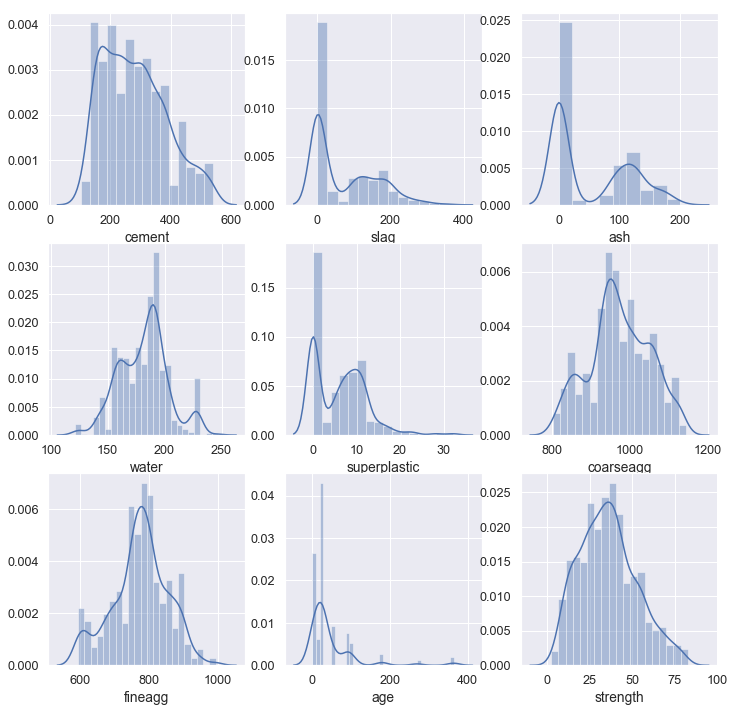

In [255]:
fig, ax2 = plt.subplots(3, 3, figsize=(12, 12))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

# b. Multivariate analysis

Pair Plot:

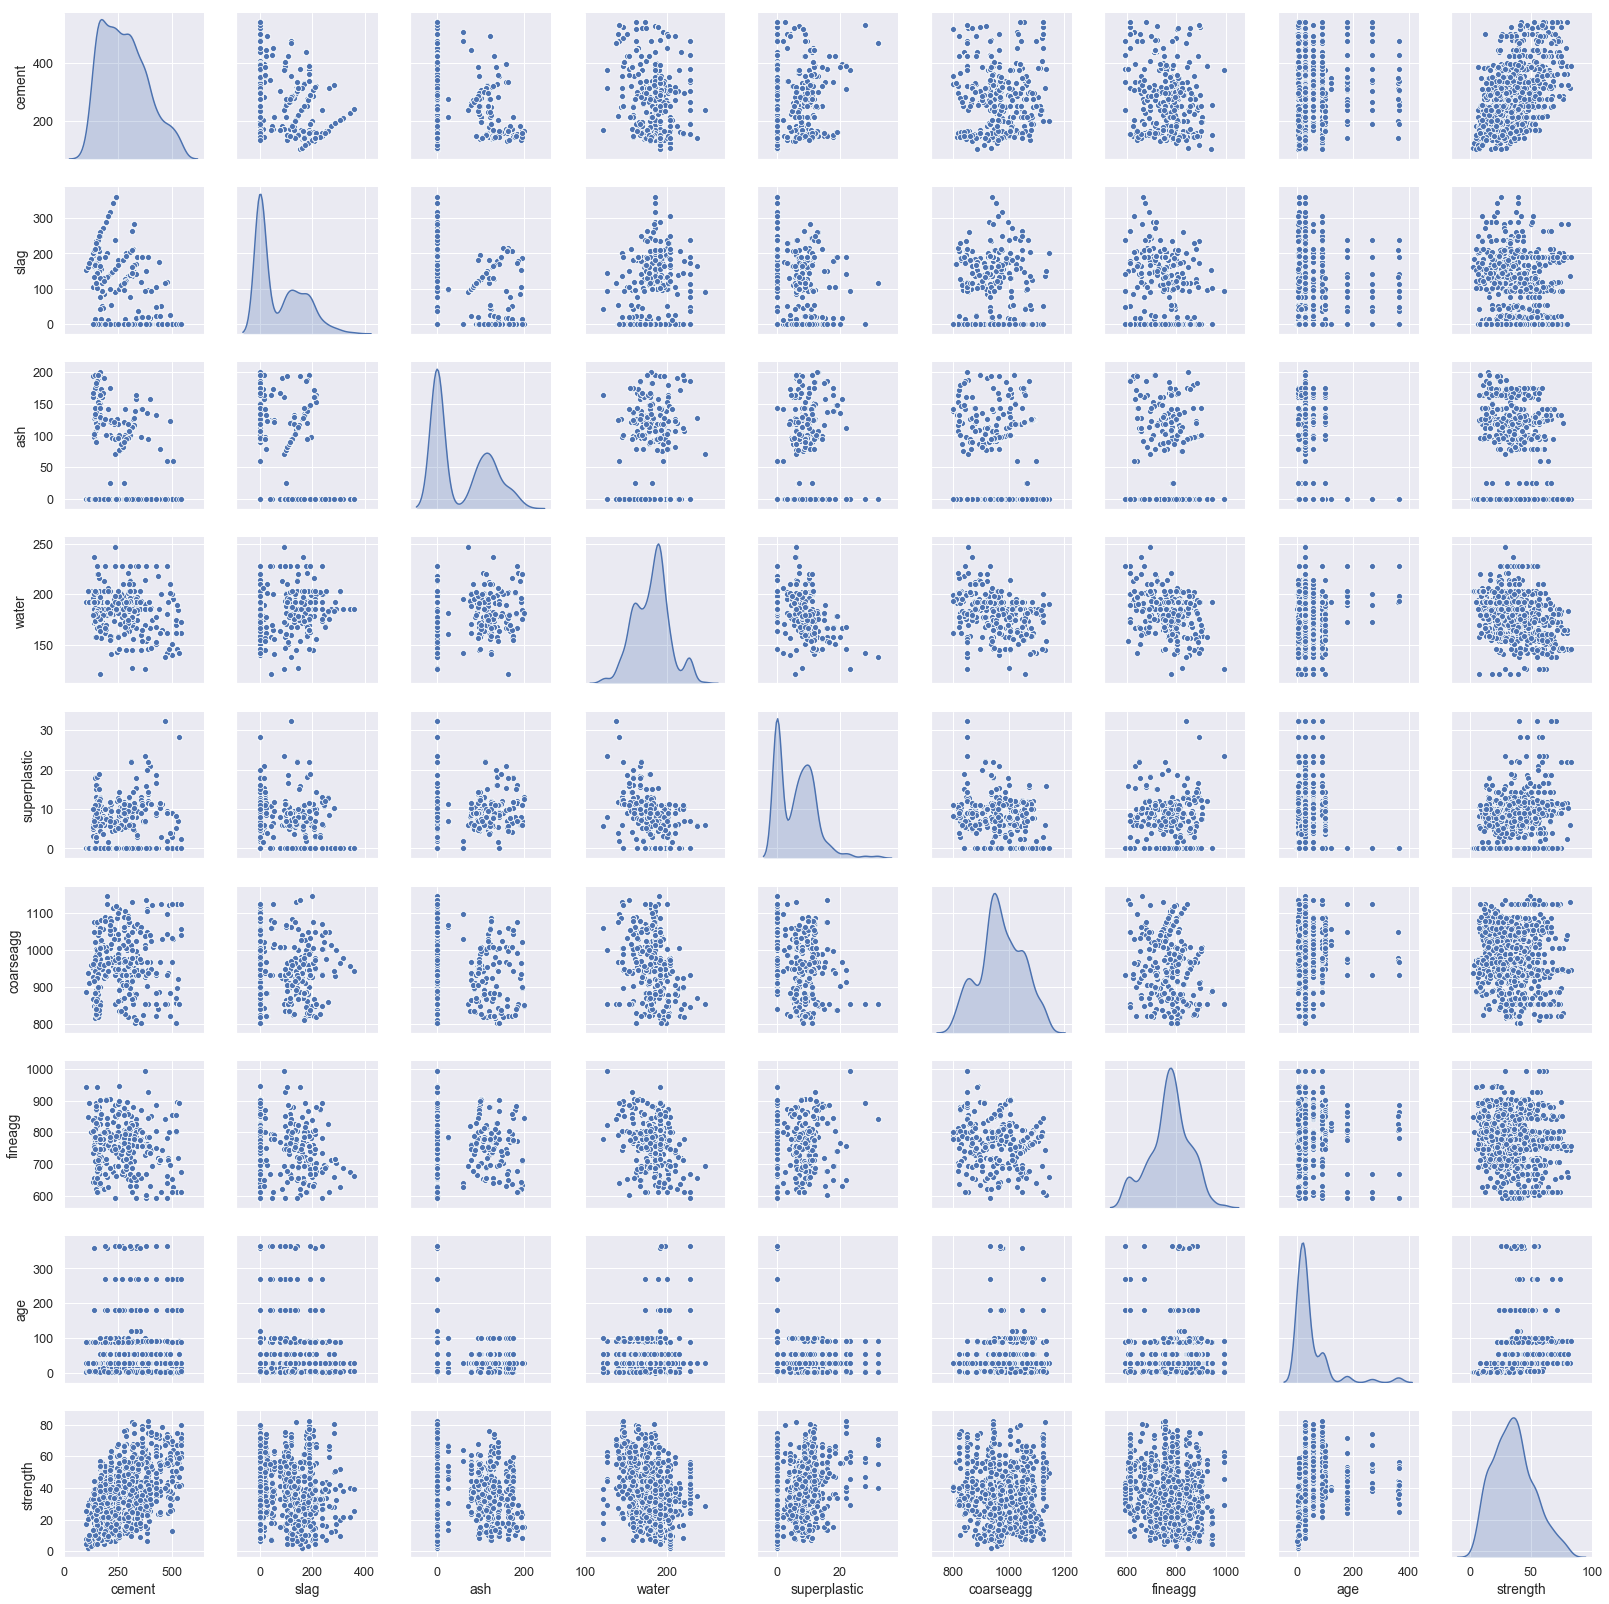

In [256]:
sns.pairplot(df,diag_kind='kde')

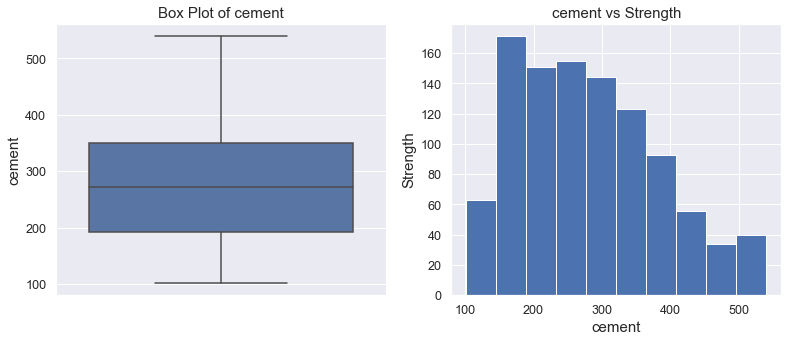

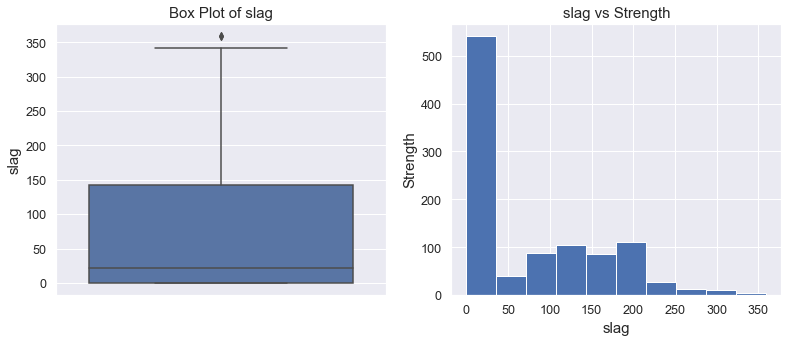

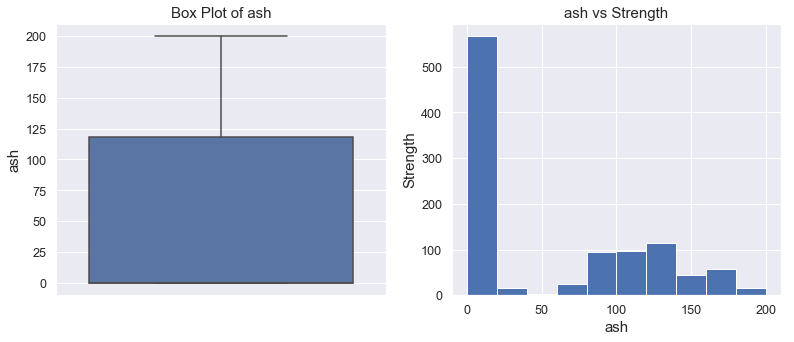

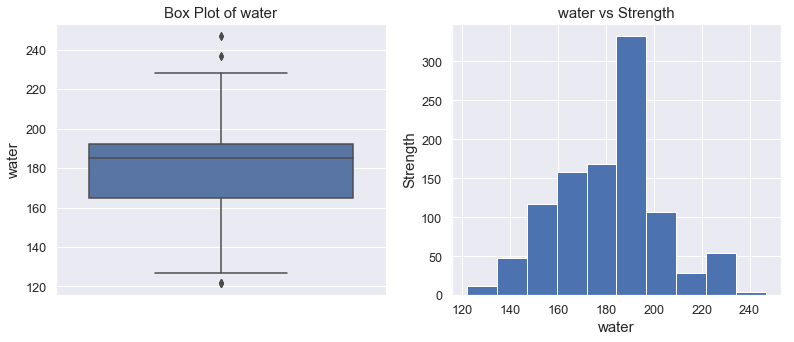

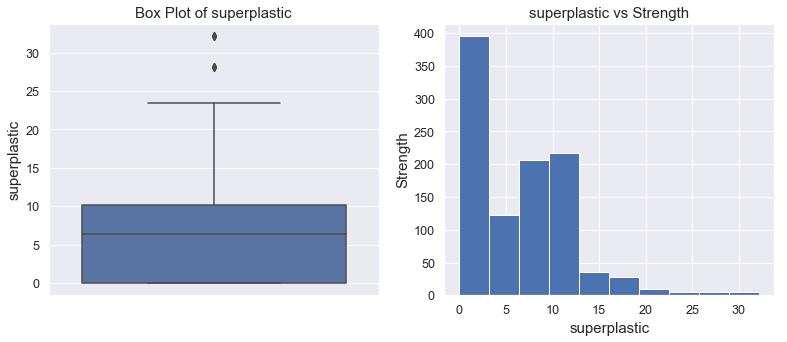

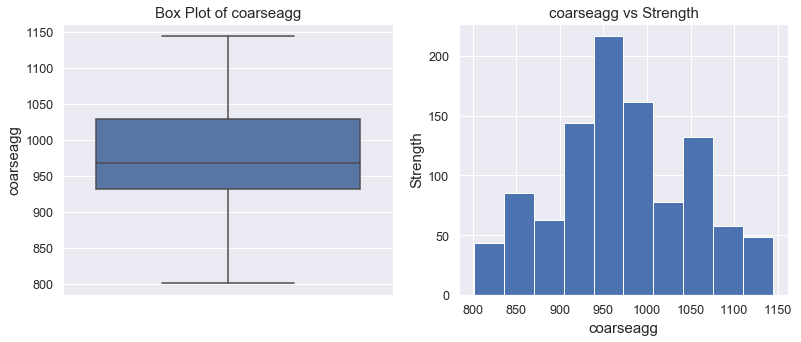

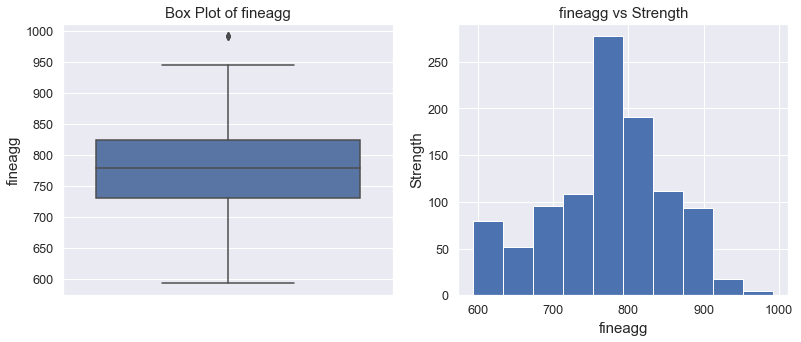

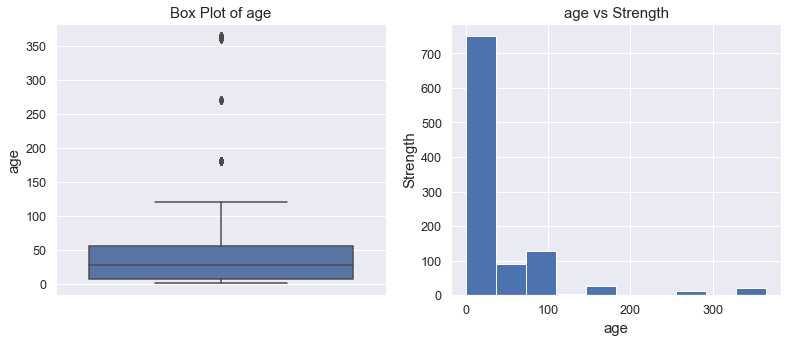

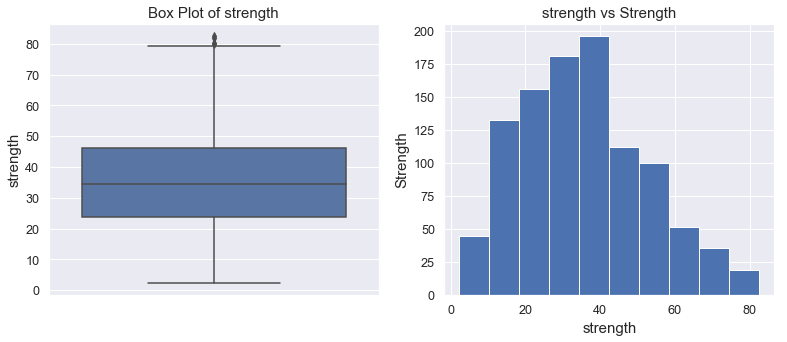

In [257]:
for each in list_of_cols:
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
    #Box Plot
    sns.boxplot(x=each,data=df,orient='v',ax=ax1)
    ax1.set_ylabel(each, fontsize=15)
    ax1.set_title('Box Plot of '+each, fontsize=15)

    #Histogram
    ax2.hist(df[each])
    ax2.set_xlabel(each, fontsize=15)
    ax2.set_ylabel('Strength', fontsize=15)
    ax2.set_title(each+' vs Strength', fontsize=15)

In [258]:
# correlation matrix 
cor_matrix=df.corr()
cor_matrix

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


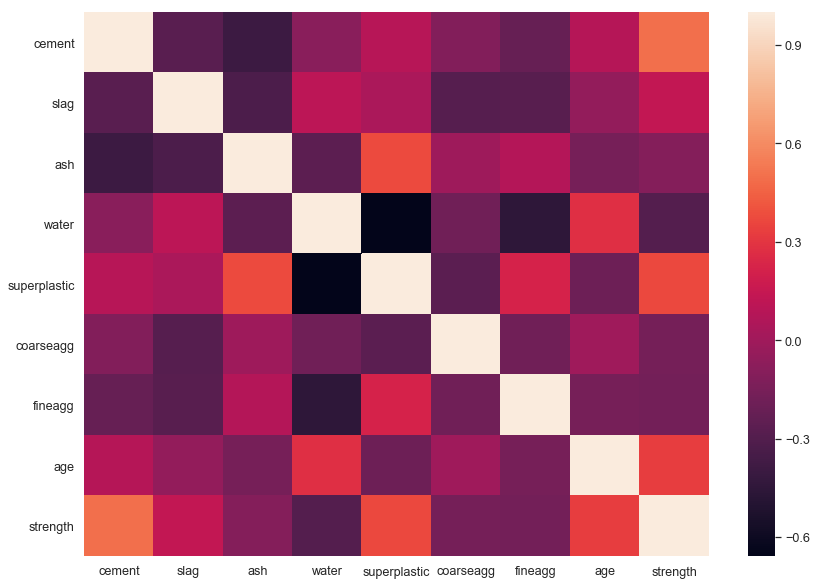

In [259]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.heatmap(cor_matrix)


In [260]:
df.isnull().values.any()

False

By looking at the box plots we can understand that the columns slag, ash, superplastic, age are rightly skewed.
Also, water looks like it is slightly left skewed.
Also, there are no missing values in the data.
By looking at the correlation matrix we can observe that there are no good predictors of strength.

# c.Pick one strategy to address the presence outliers and missing values and perform necessary imputation

Strategy used to address the outliers : Replace them with median

In [261]:
list_of_cols_with_outliers=['slag','ash','superplastic','age','water']
for col_name in list_of_cols_with_outliers:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()    

# 2. Feature Engineering Techniques

# a. Identify opportunities to create a composite feature, drop a feature etc

I don't see any good predictors of strength to create a composite feature.

In [262]:
df_scaled = df.apply(zscore)
df_scaled=pd.DataFrame(df_scaled)

slag has 2 gaussians <br />
ash has 2 gaussians <br />
coarseagg has 3 gaussians <br />
fineagg has 2-3 gaussians <br />
water,superplastic,age also have few gaussians <br />

# 3. Create the Model

In [281]:
X = df_scaled.iloc[:,0:8]
y = df_scaled.iloc[:,8]

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

Started with Decision Tree so it could be easier to understand the feature importances

In [265]:
clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [266]:
clf_dt.feature_importances_

array([0.35689518, 0.09522779, 0.01250549, 0.12495312, 0.01483357,
       0.0359552 , 0.03107753, 0.32855211])

Cement and Age seem to have good feature importance scores

# 4.Tuning the model

# 1. Decision Tree Regressor:

In [267]:
y_pred = clf_dt.predict(X_test)
print('Accuracy Score - Training Data ',clf_dt.score(X_train,y_train))
print('Accuracy Score - Test Data ',clf_dt.score(X_test,y_test))
print('R2 Score ',metrics.r2_score(y_test, y_pred))

Accuracy Score - Training Data  0.9917907393004437
Accuracy Score - Test Data  0.8436033719608975
R2 Score  0.8436033719608974


Looks like DecisionTree Regressor is overfitting the model which can be inferred by comparing the training and testing accuracy scores

In [268]:
#Ignored the features with less feature importance
X_train_subset = X_train[['cement','slag','water','age']]
X_test_subset = X_test[['cement','slag','water','age']]

In [269]:
clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train_subset , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [270]:
y_pred = clf_dt.predict(X_test_subset)
print('Accuracy Score - Training Data ',clf_dt.score(X_train_subset,y_train))
print('Accuracy Score - Test Data ',clf_dt.score(X_test_subset,y_test))
print('R2 Score ',metrics.r2_score(y_test, y_pred))

Accuracy Score - Training Data  0.990059622939761
Accuracy Score - Test Data  0.8456193816307488
R2 Score  0.8456193816307488


Even after removing the features the less importance it didn't make a huge difference to the decision tree regressor

Looks like Decision Tree is not performing well to further tune it

# 2. Random Forest Regressor 

In [271]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [272]:
y_pred = clf_rf.predict(X_test)
print('Accuracy Score - Training Data ',clf_rf.score(X_train,y_train))
print('Accuracy Score - Test Data ',clf_rf.score(X_test,y_test))
print('R2 Score ',metrics.r2_score(y_test, y_pred))

Accuracy Score - Training Data  0.979954495911202
Accuracy Score - Test Data  0.9007166261398167
R2 Score  0.9007166261398167


In [273]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train_subset,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [274]:
y_pred = clf_rf.predict(X_test_subset)
print('Accuracy Score - Training Data ',clf_rf.score(X_train_subset,y_train))
print('Accuracy Score - Test Data ',clf_rf.score(X_test_subset,y_test))
print('R2 Score ',metrics.r2_score(y_test, y_pred))

Accuracy Score - Training Data  0.9775165853341933
Accuracy Score - Test Data  0.895826762294525
R2 Score  0.8958267622945248


In [242]:
values = df_scaled.values
n_iterations = 100        
n_size = int(len(df_scaled) * 1)    

stats = list()   
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    rfTree = RandomForestRegressor(n_estimators=100)
    rfTree.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    
    score = rfTree.score(test[:, :-1] , y_test)
    stats.append(score)

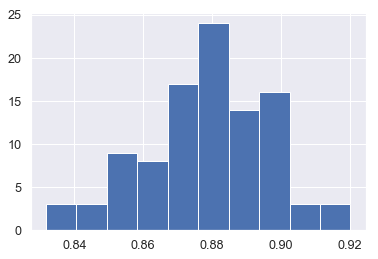

95.0 confidence interval between 84.1 and 90.9


In [243]:
plt.hist(stats)
plt.show()
alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval between %.1f and %.1f' % (alpha*100, lower*100, upper*100))

# 3. Gradient Boosting Regressor

In [283]:
rf_reg = GradientBoostingRegressor()
rf_reg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [284]:
y_pred = rf_reg.predict(X_test)
print('Accuracy Score - Training Data ',rf_reg.score(X_train,y_train))
print('Accuracy Score - Test Data ',rf_reg.score(X_test,y_test))
print('R2 Score ',metrics.r2_score(y_test, y_pred))

Accuracy Score - Training Data  0.9446642539056763
Accuracy Score - Test Data  0.8933120808300683
R2 Score  0.8933120808300683


In [275]:
values = df_scaled.values
n_iterations = 100        
n_size = int(len(df_scaled) * 1)    

stats = list()      
for i in range(n_iterations):

    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    
    gbtree = GradientBoostingRegressor(n_estimators=50)
    gbtree.fit(train[:,:-1], train[:,-1]) 

    y_test = test[:,-1]    
    score = gbtree.score(test[:, :-1] , y_test)
    predictions = gbtree.predict(test[:, :-1])  

    stats.append(score)

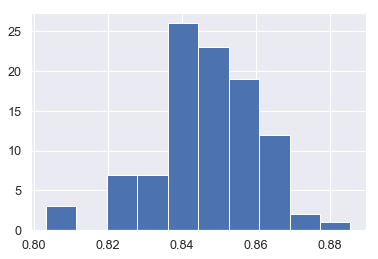

95.0 confidence interval between 81.5 and 87.0


In [276]:
plt.hist(stats)
plt.show()
alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval between %.1f and %.1f' % (alpha*100, lower*100, upper*100))

RandomForest Model is performing better when compared with other models